<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-have-we-covered?" data-toc-modified-id="What-have-we-covered?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What have we covered?</a></span></li><li><span><a href="#...-and-the-and-the-Cross-Section-of-Expected-Returns" data-toc-modified-id="...-and-the-and-the-Cross-Section-of-Expected-Returns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>... and the and the Cross-Section of Expected Returns</a></span></li><li><span><a href="#Plan-for-Today" data-toc-modified-id="Plan-for-Today-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plan for Today</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Download Data</a></span><ul class="toc-item"><li><span><a href="#Delete-missing-returns" data-toc-modified-id="Delete-missing-returns-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Delete missing returns</a></span></li><li><span><a href="#Delete-missing-characteristics" data-toc-modified-id="Delete-missing-characteristics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Delete missing characteristics</a></span></li></ul></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Summary</a></span></li><li><span><a href="#Forcasting-Future-Excess-Returns" data-toc-modified-id="Forcasting-Future-Excess-Returns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Forcasting Future Excess Returns</a></span><ul class="toc-item"><li><span><a href="#Does-ret1-forcast-future-returns?" data-toc-modified-id="Does-ret1-forcast-future-returns?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Does ret1 forcast future returns?</a></span></li><li><span><a href="#Does-ret11-forcast-future-returns?" data-toc-modified-id="Does-ret11-forcast-future-returns?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Does ret11 forcast future returns?</a></span></li><li><span><a href="#Do-ret11_1-and-ret1-forcast-future-returns?" data-toc-modified-id="Do-ret11_1-and-ret1-forcast-future-returns?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Do ret11_1 and ret1 forcast future returns?</a></span></li></ul></li><li><span><a href="#Long-short-portfolio" data-toc-modified-id="Long-short-portfolio-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Long-short portfolio</a></span><ul class="toc-item"><li><span><a href="#Sort-Portfolio" data-toc-modified-id="Sort-Portfolio-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Sort Portfolio</a></span></li><li><span><a href="#Portfolio-returns" data-toc-modified-id="Portfolio-returns-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Portfolio returns</a></span><ul class="toc-item"><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Merge data</a></span></li><li><span><a href="#Calculate-returns" data-toc-modified-id="Calculate-returns-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Calculate returns</a></span></li><li><span><a href="#Long-short-portfolio-returns" data-toc-modified-id="Long-short-portfolio-returns-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Long-short portfolio returns</a></span></li></ul></li><li><span><a href="#Compare-Sharpe-ratio" data-toc-modified-id="Compare-Sharpe-ratio-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Compare Sharpe-ratio</a></span></li></ul></li><li><span><a href="#Are-there-alphas?" data-toc-modified-id="Are-there-alphas?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Are there alphas?</a></span></li><li><span><a href="#Should-we-add-Reversal-to-our-portfolio?" data-toc-modified-id="Should-we-add-Reversal-to-our-portfolio?-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Should we add Reversal to our portfolio?</a></span></li><li><span><a href="#Optimal-Portfolio" data-toc-modified-id="Optimal-Portfolio-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Optimal Portfolio</a></span></li></ul></div>

## What have we covered?
1. Overview of CRSP
2. Overview of Compustat
3. Merge CRSP and Compustat
4. The building block of factor investment: application Fama and French 5 Factors
5. Homework: Momentum 

## ... and the and the Cross-Section of Expected Returns

1. [Harvey, Liu and Zhu (RFS, 2016)](https://academic.oup.com/rfs/article/29/1/5/1843824)
    1. "Hundreds of papers and factors attempt to explain the cross-section of expected returns."
    2. They [list 313 papers](http://faculty.fuqua.duke.edu/~charvey/Factor-List.xlsx) published in a selection of journals that study cross-sectional return patterns. 

2. The majority of those papers goes: 
    1. We show that stocks with high value of x on average outperform stocks with low value of x.
    2. Is it robust? Run a Fama-MacBeth regression;
    3. Is it explained by risk? Form a long-short portfolio based on the new characteristic sort. Test if this portfolio earns an "alpha" with respect the benchmark model.

## Plan for Today

1. Study the mom vs. short-term reversal strategies;
2. Fama-MacBeth regression;
3. Alpha evaluation

## Set Up

In [2]:
#%% Packages 
import sys
import pandas as pd
from pandas.tseries.offsets import MonthEnd

import numpy as np
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

In [3]:
# Packages from fire_pytools
sys.path.append("/Users/liramertens/src/fire_pytools") 


from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *
from utils.post_event_nan import * 

## Download Data

In [4]:
mdata = pd.read_pickle('/Users/liramertens/Dropbox/Columbia/BigData/class2021/data/stock_monthly.pkl')

In [5]:
# Clean Data
## Data start in 2010
mdata = mdata[mdata.date>='1970-01-01']
## Share type - select only common stocks 
mdata = mdata[mdata.shrcd.isin([10, 11])]
## Select stocks traded on the major stock exchanges
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]
## Order
mdata = mdata.sort_values(['permno','date'])

In [6]:
# Work with excess returns
mdata['exret'] = mdata['retadj'] - mdata['rf']

In [7]:
mdata.columns

Index(['permno', 'date', 'dlret', 'dlretx', 'exchcd', 'naics', 'permco', 'prc',
       'ret', 'shrcd', 'shrout', 'siccd', 'ticker', 'rankyear', 'retadj', 'me',
       'lag_me', 'lag_dlret', 'melag_weights', 'mdate', 'rf', 'exret'],
      dtype='object')

In [8]:
mdata = mdata[['permno', 'date', 'exret', 'permco','me', 'melag_weights', 'siccd', 'exchcd']].copy()

In [9]:
mdata

permno       date     exret   permco             me  melag_weights  \
1         10000 1986-01-31       NaN   7952.0      16.100000            NaN   
2         10000 1986-02-28 -0.262439   7952.0      11.960000      16.100000   
3         10000 1986-03-31  0.359422   7952.0      16.330000      11.960000   
4         10000 1986-04-30 -0.103933   7952.0      15.172000      16.330000   
5         10000 1986-05-30 -0.227590   7952.0      11.793859      15.172000   
...         ...        ...       ...      ...            ...            ...   
4701011   93436 2020-08-31  0.741373  53453.0  464339.067705  266639.296940   
4701012   93436 2020-09-30 -0.139163  53453.0  406701.489258  464339.067705   
4701013   93436 2020-10-30 -0.095572  53453.0  367823.512140  406701.489258   
4701014   93436 2020-11-30  0.462670  53453.0  538028.584458  367823.512140   
4701015   93436 2020-12-31  0.243192  53453.0  668905.282471  538028.584458   

          siccd  exchcd  
1        3990.0     3.0  
2        3990.0     3.0  
3        3990.0     3.0  
4        3990.0     3.0  
5        3990.0     3.0  
...         ...     ...  
4701011  9999.0     3.0  
4701012  9999.0     3.0  
4701013  9999.0     3.0  
4701014  9999.0     3.0  
4701015  9999.0     3.0  

[3070119 rows x 8 columns]

In [10]:
# Create past returns
mdata['ret1'] = mdata.groupby('permno').exret.shift(1)

In [11]:
mdata[['permno','date','exret','ret1']].head()

permno       date     exret      ret1
1   10000 1986-01-31       NaN       NaN
2   10000 1986-02-28 -0.262439       NaN
3   10000 1986-03-31  0.359422 -0.262439
4   10000 1986-04-30 -0.103933  0.359422
5   10000 1986-05-30 -0.227590 -0.103933

In [12]:
mdata[mdata.permno==10000].tail()

permno       date     exret  permco        me  melag_weights   siccd  \
14   10000 1987-02-27 -0.004309  7952.0  1.581531       1.581531  3990.0   
15   10000 1987-03-31 -0.389627  7952.0  0.973250       1.581531  3990.0   
16   10000 1987-04-30 -0.066785  7952.0  0.912422       0.973250  3990.0   
17   10000 1987-05-29 -0.070427  7952.0  0.851594       0.912422  3990.0   
18   10000 1987-06-30 -0.005031  7952.0       NaN       0.851594  3990.0   

    exchcd      ret1  
14     3.0 -0.216272  
15     3.0 -0.004309  
16     3.0 -0.389627  
17     3.0 -0.066785  
18     3.0 -0.070427

In [18]:
mdata['date_diff'] = mdata.groupby('permno').date.diff()

In [19]:
mdata.date_diff.describe()

count                       3045910
mean     31 days 02:37:52.964861077
std      45 days 08:32:44.531199276
min                28 days 00:00:00
25%                29 days 00:00:00
50%                31 days 00:00:00
75%                31 days 00:00:00
max             12906 days 00:00:00
Name: date_diff, dtype: object

In [20]:
mdata['diff_date']>31

KeyError: 'diff_date'

In [21]:
mdata

permno       date     exret   permco             me  melag_weights  \
1         10000 1986-01-31       NaN   7952.0      16.100000            NaN   
2         10000 1986-02-28 -0.262439   7952.0      11.960000      16.100000   
3         10000 1986-03-31  0.359422   7952.0      16.330000      11.960000   
4         10000 1986-04-30 -0.103933   7952.0      15.172000      16.330000   
5         10000 1986-05-30 -0.227590   7952.0      11.793859      15.172000   
...         ...        ...       ...      ...            ...            ...   
4701011   93436 2020-08-31  0.741373  53453.0  464339.067705  266639.296940   
4701012   93436 2020-09-30 -0.139163  53453.0  406701.489258  464339.067705   
4701013   93436 2020-10-30 -0.095572  53453.0  367823.512140  406701.489258   
4701014   93436 2020-11-30  0.462670  53453.0  538028.584458  367823.512140   
4701015   93436 2020-12-31  0.243192  53453.0  668905.282471  538028.584458   

          siccd  exchcd      ret1 date_diff  
1        3990.0     3.0       NaN       NaT  
2        3990.0     3.0       NaN   28 days  
3        3990.0     3.0 -0.262439   31 days  
4        3990.0     3.0  0.359422   30 days  
5        3990.0     3.0 -0.103933   30 days  
...         ...     ...       ...       ...  
4701011  9999.0     3.0  0.324915   31 days  
4701012  9999.0     3.0  0.741373   30 days  
4701013  9999.0     3.0 -0.139163   30 days  
4701014  9999.0     3.0 -0.095572   31 days  
4701015  9999.0     3.0  0.462670   31 days  

[3070119 rows x 10 columns]

In [16]:
mdata.diff_date>31

AttributeError: 'DataFrame' object has no attribute 'diff_date'

In [22]:
# How to work with dates
mdata['date_diff'].dt.days>31

1          False
2          False
3          False
4          False
5          False
           ...  
4701011    False
4701012    False
4701013    False
4701014    False
4701015    False
Name: date_diff, Length: 3070119, dtype: bool

In [23]:
# Are those problems?
mdata.loc[(mdata.date_diff.dt.days>31), ['permno','date', 'date_diff', 'exret','ret1']].head()

permno       date date_diff     exret      ret1
9    10000 1986-09-30   32 days -0.061926 -0.619999
12   10000 1986-12-31   33 days -0.382125  0.056076
15   10000 1987-03-31   32 days -0.389627 -0.004309
18   10000 1987-06-30   32 days -0.005031 -0.070427
28   10001 1986-09-30   32 days -0.007860  0.067551

In [24]:
mdata.loc[(mdata.date_diff.dt.days>40), ['permno','date', 'date_diff', 'exret','ret1']].head()

permno       date date_diff     exret      ret1
1656   10007 1989-02-28  456 days       NaN -0.364477
2150   10012 1987-10-30   91 days       NaN  0.072865
5453   10028 2012-11-30  245 days -0.246609 -0.048392
8937   10050 1978-09-29   60 days       NaN       NaN
8938   10050 1978-12-29   91 days       NaN       NaN

In [25]:
mdata.loc[((mdata.permno==10028) & (mdata.date<'2012-12-30')), ['permno','date', 'date_diff', 'exret','ret1']]

permno       date date_diff     exret      ret1
5132   10028 1986-02-28       NaT       NaN       NaN
5133   10028 1986-03-31   31 days  0.216259       NaN
5134   10028 1986-04-30   30 days  0.176477  0.216259
5135   10028 1986-05-30   30 days  0.148912  0.176477
5136   10028 1986-06-30   31 days -0.138579  0.148912
...      ...        ...       ...       ...       ...
5442   10028 2011-12-30   30 days -0.036129 -0.070747
5443   10028 2012-01-31   32 days -0.026772 -0.036129
5444   10028 2012-02-29   29 days  0.081124 -0.026772
5445   10028 2012-03-30   30 days -0.048392  0.081124
5453   10028 2012-11-30  245 days -0.246609 -0.048392

[315 rows x 5 columns]

In [26]:
mdata.loc[(mdata.date_diff.dt.days>40), 'ret1'] = np.nan

In [27]:
# Calculate past returns 
def calculate_cumulative_returns(mdata, tt, min_periods):
    """
    Calculate past returns for momentum stratagy

    Parameters:
    ------------
    mdata: data frame
        crsp monthly data with cols permno, date as index.
    tt: int
        number of periods to cumulate retuns
    min_periods: int
    """
    start_time = time.time()
    required_cols = ['exret']

    assert set(required_cols).issubset(mdata.columns), "Required columns: {}.".format(', '.join(required_cols))

    df = mdata[required_cols].copy()

    # Before applying the function calculate_cumulative_returns you need to make sure 
    # we don't have missing dates. Missing dates would lead to the wrong number of periods 
    # to cumulate returns.

    # Resample data 
    # CRSP data has skipping months.
    # Create line to missing  months to facilitate the calculation of lag/past returns
    df.reset_index(inplace=True)
    df['edate'] = df['date'] + MonthEnd(0)
    df.sort_values(['permno', 'edate'], inplace=True)
    pk_integrity(df, ['permno', 'edate'])
    df.set_index(['edate'], inplace=True)
    # Resample to take care of missing months
    sdf = df[['permno', 'exret']].groupby('permno').resample('M').mean().drop(columns='permno')
    sdf.reset_index(inplace=True)
    print("Time to resample data: %s seconds" % str(time.time() - start_time))
    print("We have added %s rows to the data" % str(sdf.shape[0] - df.shape[0]))

    # Cumulative Return (adjusted) in tt months
    sdf['gret'] = sdf['exret'].fillna(0)+1
    sdf['ret_notnull'] = sdf['exret'].notnull()

    cret = sdf.groupby(['permno']).gret.rolling(window=tt, min_periods=1).apply(np.prod, raw=True)
    cret.reset_index(drop=True, inplace=True)

    nona_count = sdf.groupby(['permno']).ret_notnull.rolling(window=tt, min_periods=1).apply(np.sum, raw=True)
    nona_count.reset_index(drop=True, inplace=True)

    cret[nona_count<min_periods] = np.nan
    sdf['ret' + str(tt)] = cret

    # Delete rows that were not in the original data set
    df.reset_index(inplace=True)
    fdata = pd.merge(df,
             sdf[['edate', 'permno','ret' + str(tt)]],
             on = ['edate', 'permno'])         
    fdata.set_index(['permno','date'],inplace = True)
    x = fdata['ret' + str(tt)]

    print("Time to calculate %d months past returns: %s seconds" % (tt, str(round(time.time() - start_time, 2))))

    return x

In [28]:
## Calculate 11 months returns
mdata['ret11'] = calculate_cumulative_returns(mdata, 11, 8)

KeyError: 'date'

In [29]:
mdata.set_index(['permno','date'], inplace=True)

In [30]:
## Calculate 11 months returns
mdata['ret11'] = calculate_cumulative_returns(mdata, 11, 8)

Time to resample data: 83.01081585884094 seconds
We have added 67048 rows to the data
Time to calculate 11 months past returns: 113.58 seconds


In [31]:
# Make it investable
mdata['ret11_1'] = mdata.groupby('permno').ret11.shift(1)

In [32]:
mdata.loc[(mdata.date_diff.dt.days>40), 'ret11_1'] = np.nan

In [33]:
## Skip a month
mdata['ret11_2'] = mdata.groupby('permno').ret11_1.shift(1)

In [39]:
mdata.loc[(mdata.date_diff.dt.days>40), 'ret11_2'] = np.nan

In [40]:
mdata.reset_index(inplace=True)

### Delete missing returns

In [41]:
mdata = mdata[mdata['exret'].notnull()]

### Delete missing characteristics

In [42]:
mdata = mdata[mdata.ret11_1.notnull()]
mdata = mdata[mdata.ret11_2.notnull()]
mdata = mdata[mdata.ret1.notnull()]

## Data Summary

In [44]:
mdata[['exret', 'ret1', 'ret11_1', 'ret11_2']].describe()

exret          ret1       ret11_1       ret11_2
count  2.798436e+06  2.798436e+06  2.798436e+06  2.798436e+06
mean   8.070252e-03  8.659944e-03  1.085349e+00  1.084665e+00
std    1.853385e-01  1.833047e-01  6.938000e-01  6.912487e-01
min   -1.014149e+00 -9.951580e-01  3.672953e-06  3.672953e-06
25%   -7.030688e-02 -7.035413e-02  7.454867e-01  7.454685e-01
50%   -3.784000e-03 -3.820382e-03  1.002367e+00  1.001356e+00
75%    6.863160e-02  6.898307e-02  1.274990e+00  1.273361e+00
max    2.399694e+01  2.399694e+01  9.950345e+01  9.950345e+01

## Forcasting Future Excess Returns

In [45]:
# FamaMacBeth regression
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fm_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat']]

In [ ]:
### Does ret_11_1 forcast future returns?

In [46]:
gamma_mom = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_1'))
gamma_mom.head()

Intercept   ret11_1
date                           
1970-10-30  -0.188809  0.152010
1970-11-30  -0.065803  0.084473
1970-12-31   0.086035 -0.009531
1971-01-29   0.292070 -0.180755
1971-02-26   0.086903 -0.045724

<AxesSubplot:xlabel='date'>

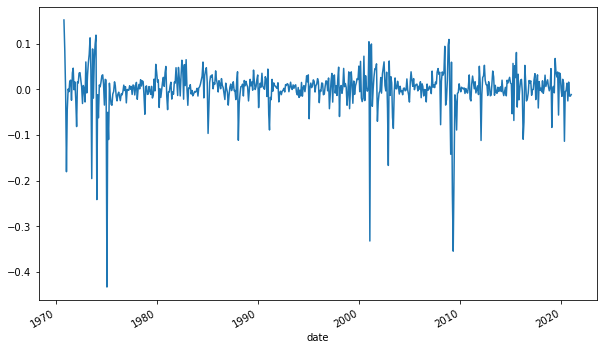

In [47]:
gamma_mom.ret11_1.plot()

In [48]:
# Fama-Macbeth regressions results
fm_summary(gamma_mom)

mean  std_error     tstat
Intercept  0.005870   0.003348  1.753491
ret11_1    0.001266   0.001876  0.674908

### Does ret1 forcast future returns?

In [49]:
gamma_rev = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret1'))
gamma_rev.head()

Intercept      ret1
date                           
1970-10-30  -0.033043 -0.258334
1970-11-30   0.006658  0.114236
1970-12-31   0.078616 -0.030629
1971-01-29   0.151923 -0.229959
1971-02-26   0.043502  0.002026

In [50]:
# Fama-Macbeth regressions results
fm_summary(gamma_rev) 

mean  std_error      tstat
Intercept  0.007915   0.002345   3.375215
ret1      -0.042600   0.004246 -10.033384

### Does ret11 forcast future returns?

In [51]:
gamma_mom2 = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_2'))
gamma_mom2.head()

Intercept   ret11_2
date                           
1970-10-30  -0.207653  0.192657
1970-11-30  -0.074125  0.090033
1970-12-31   0.084399 -0.007466
1971-01-29   0.268723 -0.174363
1971-02-26   0.088120 -0.050674

In [52]:
# Fama-Macbeth regressions results
fm_summary(gamma_mom2)

mean  std_error     tstat
Intercept  0.002375   0.003181  0.746601
ret11_2    0.005027   0.001682  2.989360

### Do ret11_1 and ret1 forcast future returns?

In [53]:
# Fama-Macbeth regressions results
gamma = (mdata[mdata.exret.notnull()].groupby('date')
                .apply(ols_coef,'exret ~ 1 + ret11_2 + ret1'))
fm_summary(gamma)

mean  std_error      tstat
Intercept  0.002039   0.003069   0.664317
ret11_2    0.005074   0.001609   3.152837
ret1      -0.043671   0.004007 -10.899636

## Long-short portfolio

### Sort Portfolio

In [54]:
mdata['mesum'] = mdata.groupby(['date', 'permco']).me.transform(np.sum, min_count=1)

In [55]:
mdata = mdata[mdata.mesum.notnull()]

In [56]:
mdata.reset_index(inplace=True)

In [57]:
port = sort_portfolios(data = mdata,
                       quantiles={'mesum': [0.5],
                                  'ret11_2': [0.3, 0.7],
                                  'ret11_1': [0.3, 0.7],
                                  'ret1': [0.3, 0.7]},
                       id_variables=['date', 'permno', 'exchcd'],
                       exch_cd=[1])

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret11_2.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret11_1.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00
NYSE breakpoints were calculated for ret1.
Stocks were sorted according to breakpoints, starting in 1970-10-30 00:00:00


Look at the data.

In [59]:
port[port.permno==10006].head()

date   permno ret1portfolio ret11_1portfolio ret11_2portfolio  \
0    1970-10-30  10006.0         ret12         ret11_12         ret11_22   
2152 1970-11-30  10006.0         ret12         ret11_12         ret11_22   
4320 1970-12-31  10006.0         ret13         ret11_12         ret11_22   
6499 1971-01-29  10006.0         ret11         ret11_12         ret11_22   
8688 1971-02-26  10006.0         ret12         ret11_12         ret11_22   

     mesumportfolio  
0            mesum2  
2152         mesum2  
4320         mesum2  
6499         mesum2  
8688         mesum2

### Portfolio returns

#### Merge data

In [60]:
fdata = pd.merge(mdata[['permno', 'date', 'exret', 'melag_weights']], 
                port,
                on = ['permno', 'date']) 

Have a look at Apple in 2019. Which portfolio did Apple belong to?

In [ ]:
fdata[(fdata.permno=='AAPL') & (fdata.date.dt.year>=2019)]

#### Calculate returns

In [61]:
# Reversal Returns 
rev = fdata.groupby(['date', 
                     'mesumportfolio', 
                     'ret1portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                   weights = x['melag_weights']))

In [62]:
rev

date        mesumportfolio  ret1portfolio
1970-10-30  mesum1          ret11           -0.025202
                            ret12           -0.055249
                            ret13           -0.101283
            mesum2          ret11           -0.009772
                            ret12           -0.018604
                                               ...   
2020-12-31  mesum1          ret12            0.081121
                            ret13            0.085519
            mesum2          ret11            0.032006
                            ret12            0.050232
                            ret13            0.080496
Length: 3618, dtype: float64

In [63]:
rev = rev.unstack(level=[1, 2])

In [64]:
rev

mesumportfolio    mesum1                        mesum2                    
ret1portfolio      ret11     ret12     ret13     ret11     ret12     ret13
date                                                                      
1970-10-30     -0.025202 -0.055249 -0.101283 -0.009772 -0.018604 -0.061833
1970-11-30     -0.007556  0.007791  0.013077  0.057785  0.055633  0.043627
1970-12-31      0.089769  0.073310  0.065054  0.077108  0.059134  0.045373
1971-01-29      0.133927  0.109467  0.076747  0.043691  0.037085  0.059520
1971-02-26      0.049126  0.032587  0.023697  0.017585  0.004421  0.011798
...                  ...       ...       ...       ...       ...       ...
2020-08-31      0.054978  0.048316  0.023893  0.041022  0.066171  0.101767
2020-09-30     -0.051092 -0.051061 -0.046047 -0.028089 -0.026271 -0.050145
2020-10-30      0.023391  0.028193  0.000220 -0.020289 -0.029801 -0.012743
2020-11-30      0.211171  0.164615  0.167599  0.144474  0.106052  0.113064
2020-12-31      0.059277  0.081121  0.085519  0.032006  0.050232  0.080496

[603 rows x 6 columns]

In [65]:
rev_ret = rev.loc[:, idx[:, 'ret13']].mean(axis=1)-rev.loc[:, idx[:, 'ret11']].mean(axis=1)
rev_ret = rev_ret.to_frame('rev')

In [128]:
# Momentum not skipping 1-month
rev2 = fdata.groupby(['date', 
                      'mesumportfolio', 
                      'ret1portfolio']).apply(lambda x: np.average(x['exret']))
rev2 = rev2.unstack(level=[1, 2])
rev2_ret = rev2.loc[:, idx[:, 'ret13']].mean(axis=1)-rev2.loc[:, idx[:, 'ret11']].mean(axis=1)
rev2_ret = rev2_ret.to_frame('rev2')

In [66]:
# Momentum not skipping 1-month
mom2 = fdata.groupby(['date', 
                      'mesumportfolio', 
                      'ret11_1portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                weights = x['melag_weights']))
mom2 = mom2.unstack(level=[1, 2])
mom2_ret = mom2.loc[:, idx[:, 'ret11_13']].mean(axis=1)-mom2.loc[:, idx[:, 'ret11_11']].mean(axis=1)
mom2_ret = mom2_ret.to_frame('mom2')

In [67]:
# Momemtum Returns
mom = fdata.groupby(['date', 
                     'mesumportfolio', 
                     'ret11_2portfolio']).apply(lambda x: np.average(x['exret'], 
                                                                weights = x['melag_weights']))
mom = mom.unstack(level=[1, 2])
mom_ret = mom.loc[:, idx[:, 'ret11_23']].mean(axis=1)-mom.loc[:, idx[:, 'ret11_21']].mean(axis=1)
mom_ret = mom_ret.to_frame('mom')

In [111]:
ret = mom_ret.join(rev_ret)
ret = ret.join(mom2_ret)

In [132]:
ret= ret.join(rev2_ret)

#### Long-short portfolio returns

<AxesSubplot:xlabel='date'>

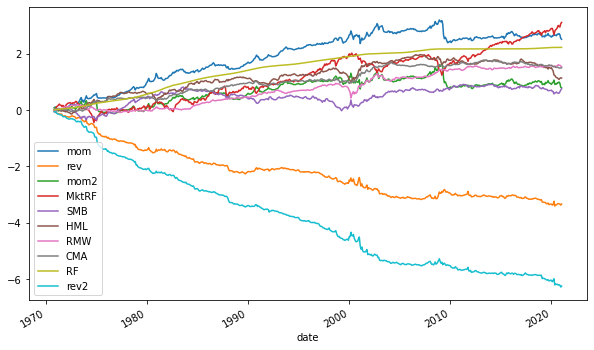

In [133]:
np.log(1+ret).cumsum().plot()

### Compare Sharpe-ratio

In [70]:
(ret.mean()/ret.std())*np.sqrt(12)

mom     0.417806
rev    -0.525622
mom2    0.182531
dtype: float64

## Are there alphas?

In [112]:
# FF five factor
ff = kf_factors(ff_factor_file='F-F_Research_Data_5_Factors_2x3', freq='monthly')
ff.drop(columns=['date'], inplace=True)
ff_ret = ff.set_index('mdate')/100
ff_ret.rename(columns = {'Mkt-RF': 'MktRF'}, inplace=True)

In [113]:
ff

Mkt-RF   SMB   HML   RMW   CMA    RF   mdate
0     -0.39 -0.45 -0.94  0.66 -1.15  0.27  196307
1      5.07 -0.82  1.82  0.40 -0.40  0.25  196308
2     -1.57 -0.48  0.17 -0.76  0.24  0.27  196309
3      2.53 -1.30 -0.04  2.75 -2.24  0.29  196310
4     -0.85 -0.85  1.70 -0.45  2.22  0.27  196311
..      ...   ...   ...   ...   ...   ...     ...
687   -2.10  4.76  4.03 -0.60 -0.53  0.01  202010
688   12.47  6.75  2.11 -2.78  1.05  0.01  202011
689    4.63  4.67 -1.36 -2.15  0.00  0.01  202012
690   -0.04  6.88  2.85 -3.33  4.68  0.00  202101
691    2.79  4.51  7.07  0.09 -1.98  0.00  202102

[692 rows x 7 columns]

In [114]:
ret.reset_index(inplace=True) 
ret['mdate'] = ret.date.dt.year * 100 +  ret.date.dt.month

In [115]:
ret.set_index('mdate', inplace=True)

In [116]:
# Merge 
ret = ret.join(ff_ret)
ret.reset_index(inplace=True)
ret.set_index('date', inplace=True)

In [117]:
ret

mdate       mom       rev      mom2   MktRF     SMB     HML  \
date                                                                       
1970-10-30  197010  0.083603 -0.064071  0.073112 -0.0228 -0.0450  0.0025   
1970-11-30  197011  0.023131  0.003238  0.023705  0.0460 -0.0400  0.0167   
1970-12-31  197012 -0.022009 -0.028225 -0.034313  0.0572  0.0303  0.0086   
1971-01-29  197101 -0.070865 -0.020675 -0.076123  0.0484  0.0754  0.0133   
1971-02-26  197102  0.003639 -0.015608 -0.002177  0.0141  0.0204 -0.0122   
...            ...       ...       ...       ...     ...     ...     ...   
2020-08-31  202008 -0.007631  0.014830 -0.008038  0.0763 -0.0094 -0.0294   
2020-09-30  202009  0.025975 -0.008506  0.033888 -0.0363  0.0007 -0.0251   
2020-10-30  202010 -0.038657 -0.007813 -0.041142 -0.0210  0.0476  0.0403   
2020-11-30  202011 -0.124104 -0.037490 -0.132172  0.1247  0.0675  0.0211   
2020-12-31  202012 -0.029536  0.037366 -0.023768  0.0463  0.0467 -0.0136   

               RMW     CMA      RF  
date                                
1970-10-30  0.0183  0.0238  0.0046  
1970-11-30  0.0175  0.0159  0.0046  
1970-12-31  0.0014  0.0028  0.0042  
1971-01-29 -0.0219 -0.0014  0.0038  
1971-02-26  0.0065 -0.0072  0.0033  
...            ...     ...     ...  
2020-08-31  0.0427 -0.0144  0.0001  
2020-09-30 -0.0115 -0.0177  0.0001  
2020-10-30 -0.0060 -0.0053  0.0001  
2020-11-30 -0.0278  0.0105  0.0001  
2020-12-31 -0.0215  0.0000  0.0001  

[603 rows x 10 columns]

In [118]:
smf.ols('mom ~ MktRF', data=ret.loc['2010-01-01':]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     15.21
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           0.000153
Time:                        11:13:29   Log-Likelihood:                 266.94
No. Observations:                 132   AIC:                            -529.9
Df Residuals:                     130   BIC:                            -524.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0041      0.003      1.401      0.163      -0.002       0.010
MktRF         -0.2579      0.066     -3.901      0.000      -0.389      -0.127
==============================================================================
Omnibus:                        3.087   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.664
Skew:                          -0.225   Prob(JB):                        0.264
Kurtosis:                       3.532   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
smf.ols('mom ~ MktRF', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     22.66
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.43e-06
Time:                        11:14:34   Log-Likelihood:                 1062.4
No. Observations:                 603   AIC:                            -2121.
Df Residuals:                     601   BIC:                            -2112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0062      0.002      3.631      0.000       0.003       0.010
MktRF         -0.1772      0.037     -4.760      0.000      -0.250      -0.104
==============================================================================
Omnibus:                      216.076   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1952.091
Skew:                          -1.322   Prob(JB):                         0.00
Kurtosis:                      11.409   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
smf.ols('mom ~ MktRF + SMB + HML', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     21.26
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.28e-13
Time:                        11:15:44   Log-Likelihood:                 1081.8
No. Observations:                 603   AIC:                            -2156.
Df Residuals:                     599   BIC:                            -2138.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0074      0.002      4.416      0.000       0.004       0.011
MktRF         -0.2172      0.038     -5.651      0.000      -0.293      -0.142
SMB           -0.0589      0.057     -1.039      0.299      -0.170       0.052
HML           -0.3520      0.057     -6.163      0.000      -0.464      -0.240
==============================================================================
Omnibus:                      214.552   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1902.800
Skew:                          -1.316   Prob(JB):                         0.00
Kurtosis:                      11.295   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
smf.ols('mom ~ MktRF + SMB + HML + RMW + CMA', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mom   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     16.69
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.91e-15
Time:                        11:16:16   Log-Likelihood:                 1090.7
No. Observations:                 603   AIC:                            -2169.
Df Residuals:                     597   BIC:                            -2143.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0056      0.002      3.314      0.001       0.002       0.009
MktRF         -0.1613      0.040     -4.003      0.000      -0.240      -0.082
SMB           -0.0101      0.059     -0.170      0.865      -0.127       0.107
HML           -0.5424      0.076     -7.173      0.000      -0.691      -0.394
RMW            0.2202      0.080      2.755      0.006       0.063       0.377
CMA            0.4248      0.120      3.531      0.000       0.189       0.661
==============================================================================
Omnibus:                      197.611   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.924
Skew:                          -1.210   Prob(JB):                         0.00
Kurtosis:                      10.690   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Should we add Reversal to our portfolio?

In [123]:
smf.ols('rev ~ MktRF + SMB + HML + RMW + CMA + mom', data=ret).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     22.62
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.45e-24
Time:                        11:16:39   Log-Likelihood:                 1267.4
No. Observations:                 603   AIC:                            -2521.
Df Residuals:                     596   BIC:                            -2490.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0048      0.001     -3.724      0.000      -0.007      -0.002
MktRF         -0.1704      0.030     -5.589      0.000      -0.230      -0.111
SMB           -0.1153      0.044     -2.597      0.010      -0.203      -0.028
HML           -0.1351      0.059     -2.296      0.022      -0.251      -0.020
RMW           -0.0103      0.060     -0.171      0.864      -0.128       0.108
CMA            0.1732      0.091      1.908      0.057      -0.005       0.351
mom            0.1810      0.031      5.922      0.000       0.121       0.241
==============================================================================
Omnibus:                       85.445   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.568
Skew:                          -0.062   Prob(JB):                    2.54e-199
Kurtosis:                       9.032   Cond. No.                         84.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
ret.drop(columns='mdate', inplace = True)

<AxesSubplot:xlabel='date'>

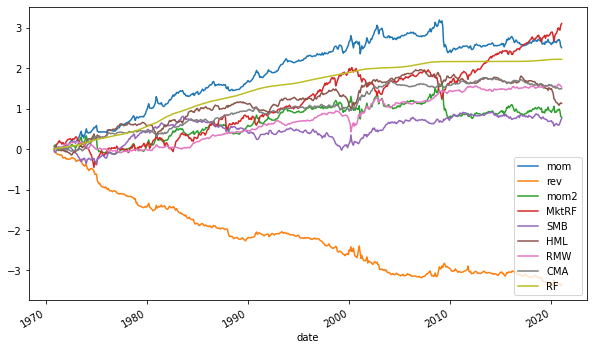

In [125]:
np.log(1+ret).cumsum().plot()

## Optimal Portfolio

In [77]:
rcov = ret[['MktRF', 'SMB', 'HML', 'RMW', 'CMA']].cov()

In [78]:
ret[['MktRF', 'SMB', 'HML', 'RMW', 'CMA']].mean()

MktRF    0.006216
SMB      0.001700
HML      0.002312
RMW      0.002806
CMA      0.002670
dtype: float64